In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('dataset.csv')

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


Most of the features are numeric and five of them are categorical.

In [13]:
df.isnull().sum() / len(df) * 100

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

Above cell shows the percent of missing datas of each feature.

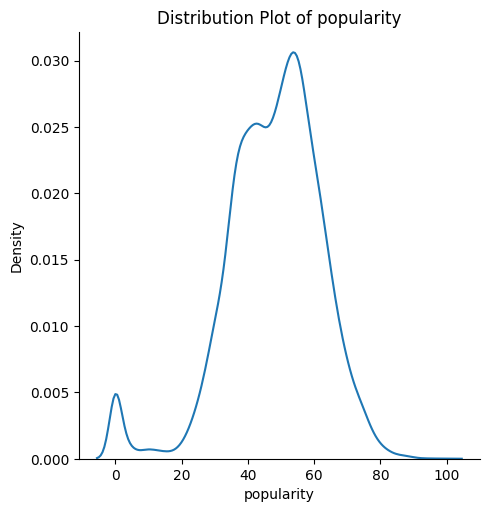

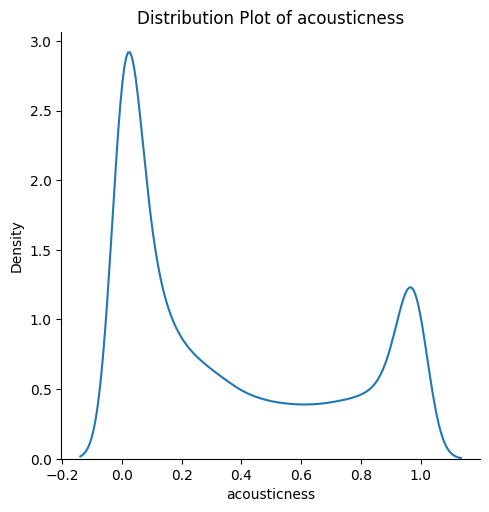

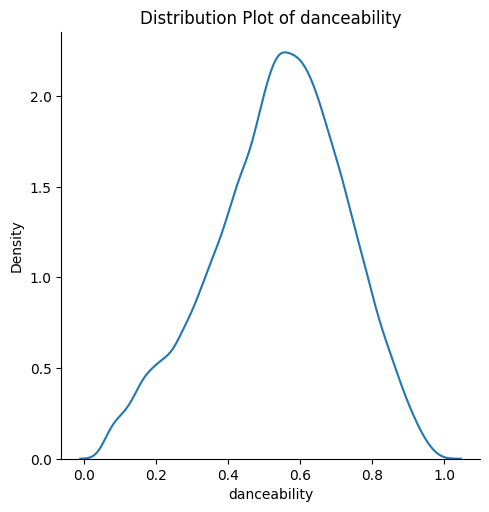

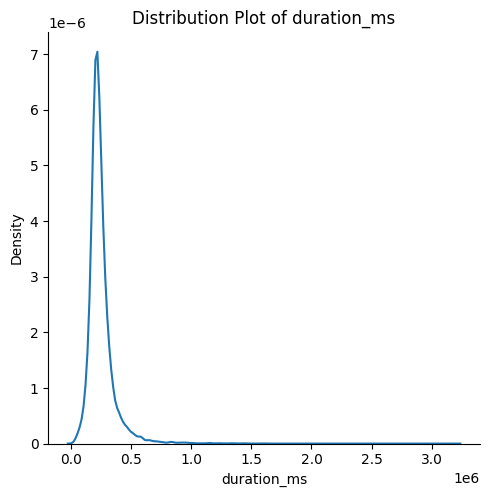

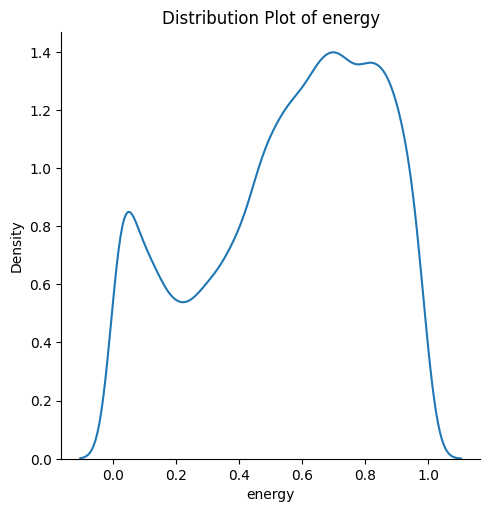

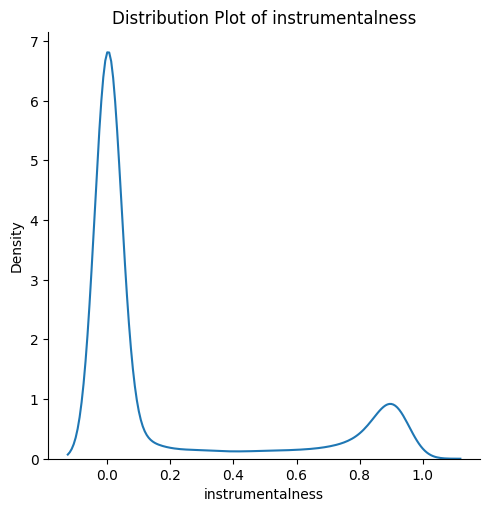

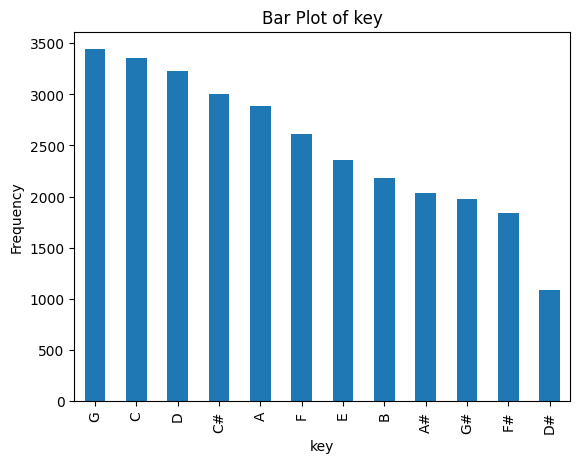

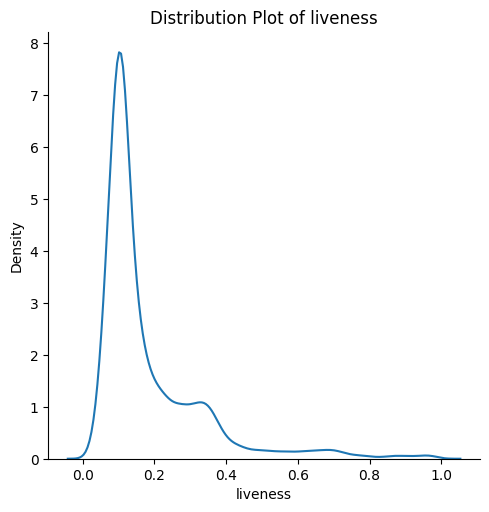

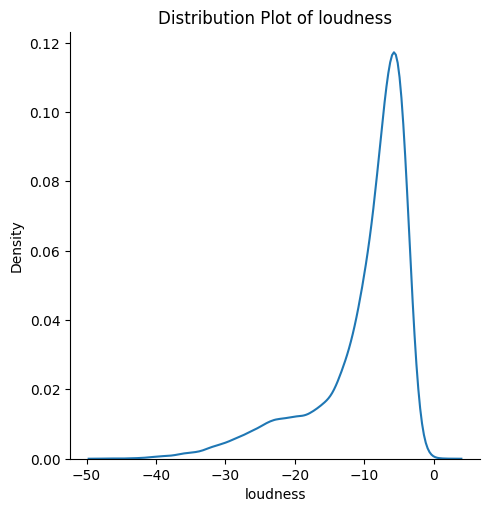

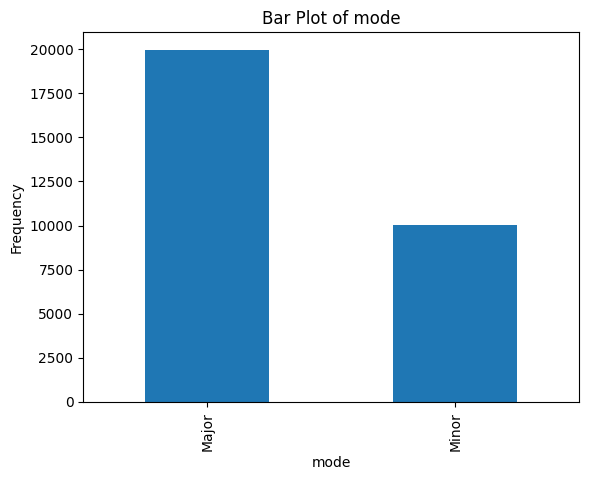

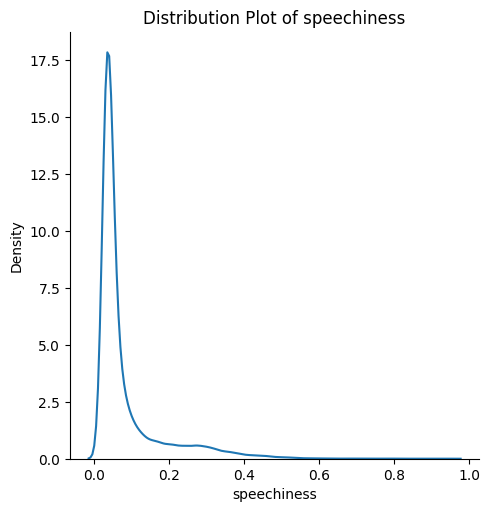

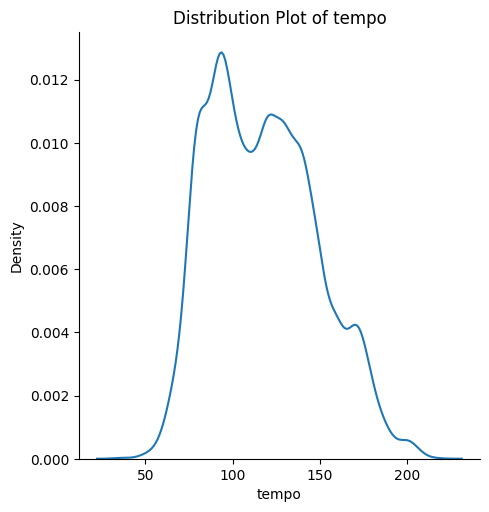

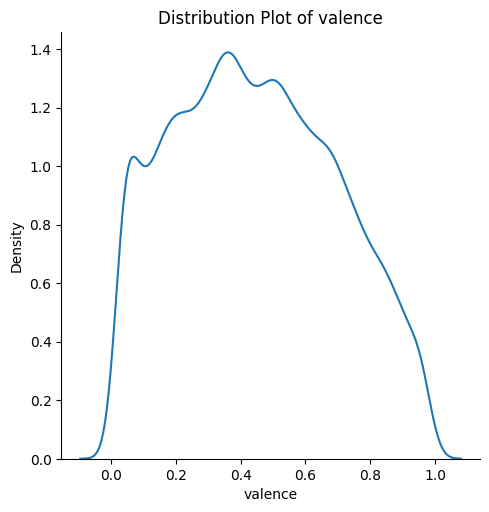

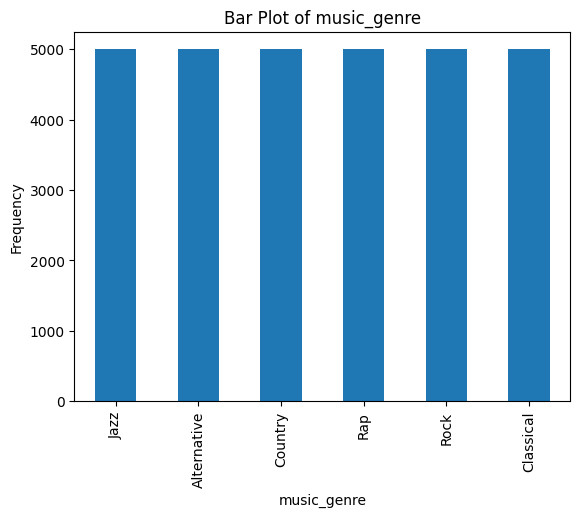

In [14]:
for feature in df:
    if str(df[feature].dtype) == 'float64':
        sns.displot(df[feature], kind='kde')
        plt.ylabel('Density')
        plt.title('Distribution Plot of %s' % feature)

    elif str(df[feature].dtype == 'object'):
        if feature in ['artist_name', 'track_name']:
            continue
        df[feature].value_counts().plot(kind='bar')
        plt.ylabel('Frequency')
        plt.title('Bar Plot of %s' % feature) 

    plt.xlabel(feature)       
    plt.show()

The numeric features distribution is normal.

There are several solutions for missing values problem. if the feature is numeric we can fill the missing value with mean or meadian and if it's categorical we can fill it with mode (the most frequently eccouring). another method is to assume the missing feature as label and make a model on top of this and try to predict the missing values. all the above method has advantages and disadvantages. for example if we take the mean of all examples in a feature, all missing datas in that feature will be the same and it's not a good model. for thet we can get mean of that feature for each label; for example calculate mean of all music durations with label jazz for filling the missing datas with jazz label.
in this project I filled missing values of numerical features with mean of each label.

In [17]:
for feature in df:
    if df[feature].isnull().values.any():
        if str(df[feature].dtype) == 'float64':
            # mean = df.loc[df]
            # df[feature].fillna(mean, inplace=True)
            df[feature] = df.groupby('music_genre').transform(lambda x: x.fillna(x.mean()))
        
        if feature == 'artist_name':
            df[feature].fillna('None', inplace=True)
    
df.isnull().sum() / len(df) * 100

artist_name         0.0
track_name          0.0
popularity          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
valence             0.0
music_genre         0.0
dtype: float64

In [16]:
nominal_features = pd.get_dummies(df, drop_first=True)